### Se trata de explorar con estos datos las tecnicas de clasificacion mediante un Arbol de Decision

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Load the Breast Cancer dataset


### Select the dataset

In [14]:
import kagglehub
import os

In [11]:
# Download latest version
# To check the Kaggle Databases Guide check the page: https://www.kaggle.com/datasets 
#path = kagglehub.dataset_download("infamouscoder/dataset-netflix-shows")
#path=kagglehub.dataset_download('bricevergnou/spotify-recommendation')
path=kagglehub.dataset_download("stealthtechnologies/predict-student-performance-dataset", path='data.csv')
print("Path to dataset files:", path)

Download already complete (36014 bytes).
Path to dataset files: /home/oscar/.cache/kagglehub/datasets/stealthtechnologies/predict-student-performance-dataset/versions/1/data.csv


In [15]:
data =  pd.read_csv(path)

In [17]:
data.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [19]:
y = data['class']  # Columna 'class' como variable objetivo
X = data.drop('class', axis=1)  # Eliminar la columna 'class' del resto de los datos

In [21]:
# Al final si fue necesario necesario representar numericamente los valores categoricos
encoder = LabelEncoder()
# Codificar todas las columnas categóricas en features
X = X.apply(encoder.fit_transform)

In [22]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


## Split the dataset into training and testing sets.

In [23]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the Decision Tree model.

In [7]:
# Aca tampoco es necesario normalizar los datos
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Create a list of k values for KNN
crit = ["gini", "entropy"]#, "log_loss"]
maxdepth = range(1,20,2)
results = {}

for criterion in crit:
    print("criterion ", criterion)
    for max_depth in maxdepth:
        print("max_depth ",max_depth)
        classifier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[(criterion, max_depth)] = {
            'model': classifier,
            'accuracy': accuracy,
        }


criterion  gini
max_depth  1
max_depth  3
max_depth  5
max_depth  7
max_depth  9
max_depth  11
max_depth  13
max_depth  15
max_depth  17
max_depth  19
criterion  entropy
max_depth  1
max_depth  3
max_depth  5
max_depth  7
max_depth  9
max_depth  11
max_depth  13
max_depth  15
max_depth  17
max_depth  19


In [31]:
results.items()

dict_items([(('gini', 1), {'model': DecisionTreeClassifier(max_depth=1), 'accuracy': 0.7981538461538461}), (('gini', 3), {'model': DecisionTreeClassifier(max_depth=3), 'accuracy': 0.952}), (('gini', 5), {'model': DecisionTreeClassifier(max_depth=5), 'accuracy': 0.9766153846153847}), (('gini', 7), {'model': DecisionTreeClassifier(max_depth=7), 'accuracy': 1.0}), (('gini', 9), {'model': DecisionTreeClassifier(max_depth=9), 'accuracy': 1.0}), (('gini', 11), {'model': DecisionTreeClassifier(max_depth=11), 'accuracy': 1.0}), (('gini', 13), {'model': DecisionTreeClassifier(max_depth=13), 'accuracy': 1.0}), (('gini', 15), {'model': DecisionTreeClassifier(max_depth=15), 'accuracy': 1.0}), (('gini', 17), {'model': DecisionTreeClassifier(max_depth=17), 'accuracy': 1.0}), (('gini', 19), {'model': DecisionTreeClassifier(max_depth=19), 'accuracy': 1.0}), (('entropy', 1), {'model': DecisionTreeClassifier(criterion='entropy', max_depth=1), 'accuracy': 0.7218461538461538}), (('entropy', 3), {'model': 

## Print the results of the classification.

In [32]:
# Print the results of the classification
print("Results of Decision Tree Classification:")
for (criterion, max_depth), result in results.items():
    print(f"Criterion: {criterion}, Max Depth: {max_depth}, Accuracy: {result['accuracy']:.2f}")


Results of Decision Tree Classification:
Criterion: gini, Max Depth: 1, Accuracy: 0.80
Criterion: gini, Max Depth: 3, Accuracy: 0.95
Criterion: gini, Max Depth: 5, Accuracy: 0.98
Criterion: gini, Max Depth: 7, Accuracy: 1.00
Criterion: gini, Max Depth: 9, Accuracy: 1.00
Criterion: gini, Max Depth: 11, Accuracy: 1.00
Criterion: gini, Max Depth: 13, Accuracy: 1.00
Criterion: gini, Max Depth: 15, Accuracy: 1.00
Criterion: gini, Max Depth: 17, Accuracy: 1.00
Criterion: gini, Max Depth: 19, Accuracy: 1.00
Criterion: entropy, Max Depth: 1, Accuracy: 0.72
Criterion: entropy, Max Depth: 3, Accuracy: 0.95
Criterion: entropy, Max Depth: 5, Accuracy: 0.98
Criterion: entropy, Max Depth: 7, Accuracy: 1.00
Criterion: entropy, Max Depth: 9, Accuracy: 1.00
Criterion: entropy, Max Depth: 11, Accuracy: 1.00
Criterion: entropy, Max Depth: 13, Accuracy: 1.00
Criterion: entropy, Max Depth: 15, Accuracy: 1.00
Criterion: entropy, Max Depth: 17, Accuracy: 1.00
Criterion: entropy, Max Depth: 19, Accuracy: 1.00

## Visualize the prediction results

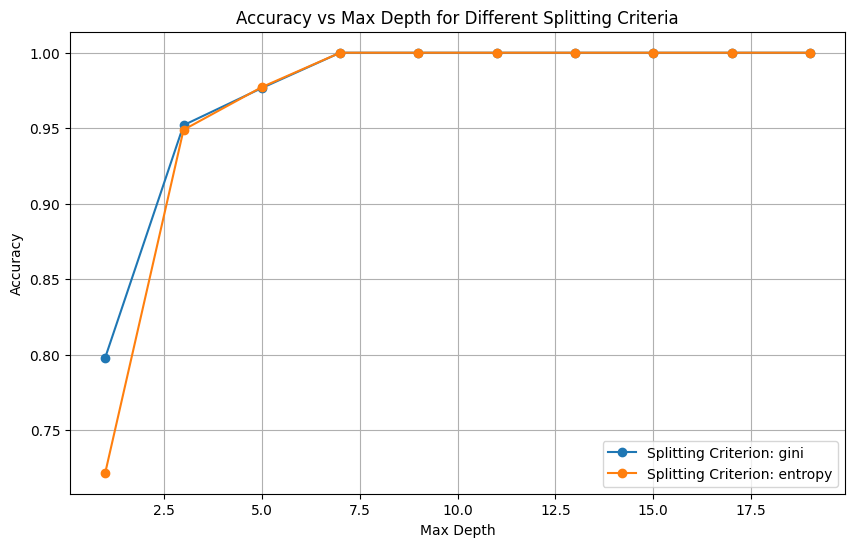

In [33]:
# Visualize the accuracy vs max depth for each splitting criterion
plt.figure(figsize=(10, 6))
for criterion in crit:
    accuracies = [result['accuracy'] for (c, md), result in results.items() if c == criterion]
    plt.plot(maxdepth, accuracies, marker='o', label=f'Splitting Criterion: {criterion}')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Splitting Criteria')
plt.legend()
plt.grid(True)
plt.show()